In [ ]:
pip install mtcnn       

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("manjilkarki/deepfake-and-real-images")

print("Path to dataset files:", path)

Path to dataset files: /teamspace/studios/this_studio/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1


In [5]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import add, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input  # Or any other preprocessing based on your model
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
Datagen=ImageDataGenerator(rescale=1./255)

In [11]:
traingen=Datagen.flow_from_directory(
    '/teamspace/studios/this_studio/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Train',
    target_size=(256,256),
    batch_size=128,
    class_mode='binary',
    shuffle=True,
    seed=42
)

validgen=Datagen.flow_from_directory(
    '/teamspace/studios/this_studio/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Validation',
    target_size=(256,256),
    batch_size=128,
    class_mode='binary',
    shuffle=True,
    seed=42
)


Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


In [17]:
model = InceptionV3(
    include_top = False,
    weights = "imagenet",
    input_shape = (256,256,3)
)

for layer in model.layers:
  layer.trainable = False

# Get the output of the InceptionV3 model
x = model.output

# Add new layers on top of the InceptionV3 output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(128, activation='relu', kernel_regularizer=l2(0.05))(x)  # Dense layer with 128 units
x = BatchNormalization()(x)  # Batch Normalization
x = Dropout(0.5)(x)  # Dropout layer with 50% dropout rate
x = Dense(64, activation='relu', kernel_regularizer=l2(0.05))(x)  # Dense layer with 64 units
x = BatchNormalization()(x)  # Batch Normalization
x = Dropout(0.3)(x)  # Dropout layer with 50% dropout rate
x = Dense(1, activation='sigmoid')(x)  # Output layer with sigmoid activation

# Create a new model with the specified inputs and outputs
model1 = Model(inputs=model.input, outputs=x)

model1.summary()

I0000 00:00:1748233798.941034    2027 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13775 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 127, 127,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 62, 62,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 22,074,145 (84.21 MB)

 Trainable params: 270,977 (1.03 MB)

 Non-trainable params: 21,803,168 (83.17 MB)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Add, Activation, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

In [ ]:
inputs = Input(shape=(256,256,3))

# Initial convolution and pooling
x = Conv2D(64, (7,7), strides=(2,2), padding='same', activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

# Residual block 1
shortcut1 = x
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = Conv2D(64, (3,3), padding='same')(x)
x = Add()([x, shortcut1])
x = Activation('relu')(x)

# Residual block 2
shortcut2 = Conv2D(128, (1,1), padding='same')(x)  # Match channels
x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = Conv2D(128, (3,3), padding='same')(x)
x = Add()([x, shortcut2])
x = Activation('relu')(x)

# Global pooling and output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs, outputs)

In [18]:
pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [visualkeras]
Note: you may need to restart the kernel to use updated packages.


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


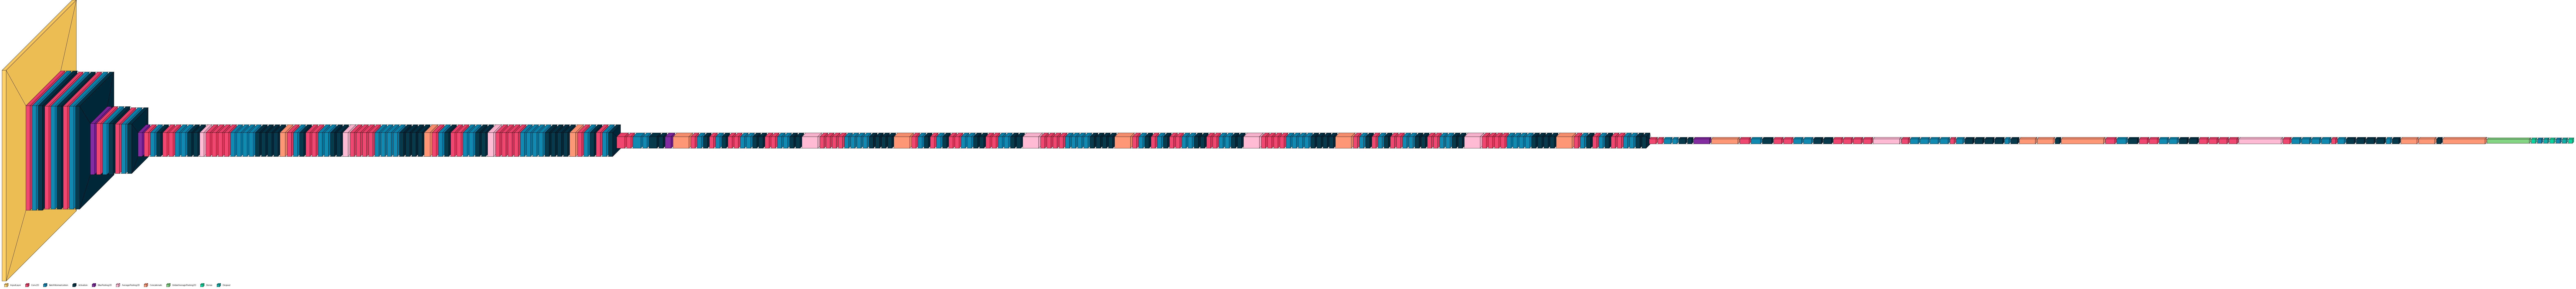

In [20]:
from visualkeras import layered_view
layered_view(model1, legend=True)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# import precision, Recall
from tensorflow.keras.metrics import Precision, Recall
# from tensorflow_addons.metrics import F1Score  # If using TensorFlow Addons

# Compile the model
model1.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="binary_crossentropy",
    metrics=["accuracy", Precision(), Recall()]
)
# Callbacks
earlystopping = EarlyStopping(
    monitor="val_loss",
    verbose=1,
    patience = 10,
    restore_best_weights=True
)

modelcheckpoint = ModelCheckpoint(
    "CustomResidualModel.keras",
    monitor="val_loss",
    verbose=1,
    save_best_only=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    verbose=1,
    min_lr=1e-6,
    patience = 1
)

# Training the model
history = model1.fit(
    traingen,
    epochs=100,
    validation_data=validgen,
    verbose=1,
    callbacks=[earlystopping, modelcheckpoint, reduce_lr]
)

Epoch 1/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.7879 - loss: 0.5244 - precision_2: 0.7741 - recall_2: 0.8145
Epoch 1: val_loss improved from inf to 0.52882, saving model to CustomResidualModel.keras
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 504s 447ms/step - accuracy: 0.7879 - loss: 0.5244 - precision_2: 0.7741 - recall_2: 0.8145 - val_accuracy: 0.7750 - val_loss: 0.5288 - val_precision_2: 0.7297 - val_recall_2: 0.8764 - learning_rate: 5.0000e-04
Epoch 2/100
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.7853 - loss: 0.5250 - precision_2: 0.7738 - recall_2: 0.8078
Epoch 2: val_loss did not improve from 0.52882

Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 472s 431ms/step - accuracy: 0.7853 - loss: 0.5250 - precision_2: 0.7738 - recall_2: 0.8078 - val_accuracy: 0.7199 - val_loss: 0.6158 - val_precision_2: 0.8972 - val_recall_2: 0.4992 - learning_rate: 5.0000e-04
Epoch 3/100
1094/1094 ━━━━━━━━━━━━━━━━━

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

# Load the saved best model
model1 = load_model("InceptionV3Model.h5")

# Recompile the model (important after loading)
model1.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="binary_crossentropy",
    metrics=["accuracy", Precision(), Recall()]
)

# Callbacks
earlystopping = EarlyStopping(
    monitor="val_loss",
    verbose=1,
    patience=200,
    restore_best_weights=True
)

modelcheckpoint = ModelCheckpoint(
    "InceptionV3ModelUpdatedV2.h5",  # overwrite with the better one if it appears
    monitor="val_loss",
    verbose=1,
    save_best_only=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    verbose=1,
    min_lr=1e-6,
    patience=1
)

# Resume training from epoch 20
initial_epoch = 34
total_epochs = 1000

history = model1.fit(
    traingen,
    epochs=total_epochs,
    steps_per_epoch=390,
    initial_epoch=initial_epoch,
    validation_data=validgen,
    validation_steps=117,
    verbose=1,
    callbacks=[earlystopping, modelcheckpoint, reduce_lr]
)


Epoch 35/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7838 - loss: 0.5028 - precision_2: 0.7740 - recall_2: 0.8050
Epoch 35: val_loss improved from inf to 0.52105, saving model to InceptionV3ModelUpdatedV2.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 1483s 4s/step - accuracy: 0.7838 - loss: 0.5028 - precision_2: 0.7740 - recall_2: 0.8050 - val_accuracy: 0.7752 - val_loss: 0.5210 - val_precision_2: 0.7110 - val_recall_2: 0.9319 - learning_rate: 5.0000e-04
Epoch 36/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.7923 - loss: 0.5043 - precision_2: 0.7775 - recall_2: 0.8177
Epoch 36: val_loss improved from 0.52105 to 0.51991, saving model to InceptionV3ModelUpdatedV2.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 214s 548ms/step - accuracy: 0.7923 - loss: 0.5043 - precision_2: 0.7775 - recall_2: 0.8177 - val_accuracy: 0.7851 - val_loss: 0.5199 - val_precision_2: 0.8486 - val_recall_2: 0.6969 - learning_rate: 5.0000e-04
Epoch 37/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 34s 454ms/step - accuracy: 0.7892 - loss: 0.5125 - precision_2: 0.7734 - recall_2: 0.8185

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 37: val_loss did not improve from 0.51991

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
390/390 ━━━━━━━━━━━━━━━━━━━━ 189s 485ms/step - accuracy: 0.7891 - loss: 0.5125 - precision_2: 0.7734 - recall_2: 0.8177 - val_accuracy: 0.7724 - val_loss: 0.5335 - val_precision_2: 0.8298 - val_recall_2: 0.6818 - learning_rate: 5.0000e-04
Epoch 38/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.7968 - loss: 0.4912 - precision_2: 0.7799 - recall_2: 0.8218
Epoch 38: val_loss improved from 0.51991 to 0.45441, saving model to InceptionV3ModelUpdatedV2.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 202s 518ms/step - accuracy: 0.7969 - loss: 0.4912 - precision_2: 0.7799 - recall_2: 0.8218 - val_accuracy: 0.8087 - val_loss: 0.4544 - val_precision_2: 0.8233 - val_recall_2: 0.7872 - learning_rate: 1.0000e-04
Epoch 39/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.8095 - loss: 0.4574 - precision_2: 0.7981 - recall_2: 0.8319
Epoch 39: val_loss did not improve from 0.45441

Epoch 39: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.
390/390 ━━━━━━━━━━━━━━━━━━━━ 197s 505ms/step - accuracy: 0.8095 - loss: 0.4574 - precision_2: 0.7981 - recall_2: 0.8319 - val_accuracy: 0.8009 - val_loss: 0.4591 - val_precision_2: 0.8597 - val_recall_2: 0.7126 - learning_rate: 1.0000e-04
Epoch 40/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 29s 385ms/step - accuracy: 0.8173 - loss: 0.4409 - precision_2: 0.8026 - recall_2: 0.8433
Epoch 40: val_loss improved from 0.45441 to 0.43625, saving model to InceptionV3ModelUpdatedV2.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 161s 414ms/step - accuracy: 0.8171 - loss: 0.4409 - precision_2: 0.8027 - recall_2: 0.8430 - val_accuracy: 0.8113 - val_loss: 0.4363 - val_precision_2: 0.7958 - val_recall_2: 0.8351 - learning_rate: 2.0000e-05
Epoch 41/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.8188 - loss: 0.4333 - precision_2: 0.8042 - recall_2: 0.8441
Epoch 41: val_loss did not improve from 0.43625

Epoch 41: ReduceLROnPlateau reducing learning rate to 4.000000262749381e-06.
390/390 ━━━━━━━━━━━━━━━━━━━━ 199s 510ms/step - accuracy: 0.8188 - loss: 0.4333 - precision_2: 0.8042 - recall_2: 0.8441 - val_accuracy: 0.8063 - val_loss: 0.4477 - val_precision_2: 0.8368 - val_recall_2: 0.7664 - learning_rate: 2.0000e-05
Epoch 42/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.8171 - loss: 0.4312 - precision_2: 0.7986 - recall_2: 0.8422
Epoch 42: val_loss improved from 0.43625 to 0.43278, saving model to InceptionV3ModelUpdatedV2.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 190s 487ms/step - accuracy: 0.8171 - loss: 0.4312 - precision_2: 0.7987 - recall_2: 0.8422 - val_accuracy: 0.8141 - val_loss: 0.4328 - val_precision_2: 0.8248 - val_recall_2: 0.7985 - learning_rate: 4.0000e-06
Epoch 43/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 28s 375ms/step - accuracy: 0.8197 - loss: 0.4268 - precision_2: 0.8027 - recall_2: 0.8442
Epoch 43: val_loss improved from 0.43278 to 0.43211, saving model to InceptionV3ModelUpdatedV2.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 163s 417ms/step - accuracy: 0.8197 - loss: 0.4270 - precision_2: 0.8026 - recall_2: 0.8443 - val_accuracy: 0.8136 - val_loss: 0.4321 - val_precision_2: 0.8213 - val_recall_2: 0.8051 - learning_rate: 4.0000e-06
Epoch 44/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.8224 - loss: 0.4224 - precision_2: 0.8112 - recall_2: 0.8428
Epoch 44: val_loss improved from 0.43211 to 0.42871, saving model to InceptionV3ModelUpdatedV2.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 192s 492ms/step - accuracy: 0.8224 - loss: 0.4224 - precision_2: 0.8112 - recall_2: 0.8428 - val_accuracy: 0.8163 - val_loss: 0.4287 - val_precision_2: 0.8255 - val_recall_2: 0.8029 - learning_rate: 4.0000e-06
Epoch 45/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.8193 - loss: 0.4279 - precision_2: 0.8047 - recall_2: 0.8414
Epoch 45: val_loss improved from 0.42871 to 0.42828, saving model to InceptionV3ModelUpdatedV2.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 192s 492ms/step - accuracy: 0.8193 - loss: 0.4279 - precision_2: 0.8047 - recall_2: 0.8414 - val_accuracy: 0.8160 - val_loss: 0.4283 - val_precision_2: 0.8274 - val_recall_2: 0.8003 - learning_rate: 4.0000e-06
Epoch 46/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 28s 378ms/step - accuracy: 0.8261 - loss: 0.4153 - precision_2: 0.8105 - recall_2: 0.8470
Epoch 46: val_loss did not improve from 0.42828

Epoch 46: ReduceLROnPlateau reducing learning rate to 1e-06.
390/390 ━━━━━━━━━━━━━━━━━━━━ 163s 418ms/step - accuracy: 0.8259 - loss: 0.4158 - precision_2: 0.8110 - recall_2: 0.8464 - val_accuracy: 0.8126 - val_loss: 0.4288 - val_precision_2: 0.8253 - val_recall_2: 0.7984 - learning_rate: 4.0000e-06
Epoch 47/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.8183 - loss: 0.4246 - precision_2: 0.8063 - recall_2: 0.8392
Epoch 47: val_loss did not improve from 0.42828
390/390 ━━━━━━━━━━━━━━━━━━━━ 191s 488ms/step - accuracy: 0.8183 - loss: 0.4246 - precision_2: 0.806

390/390 ━━━━━━━━━━━━━━━━━━━━ 164s 419ms/step - accuracy: 0.8256 - loss: 0.4168 - precision_2: 0.8117 - recall_2: 0.8484 - val_accuracy: 0.8129 - val_loss: 0.4259 - val_precision_2: 0.8181 - val_recall_2: 0.8044 - learning_rate: 1.0000e-06
Epoch 50/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8200 - loss: 0.4256 - precision_2: 0.8097 - recall_2: 0.8409
Epoch 50: val_loss did not improve from 0.42593
390/390 ━━━━━━━━━━━━━━━━━━━━ 197s 504ms/step - accuracy: 0.8200 - loss: 0.4256 - precision_2: 0.8097 - recall_2: 0.8409 - val_accuracy: 0.8092 - val_loss: 0.4339 - val_precision_2: 0.8104 - val_recall_2: 0.8077 - learning_rate: 1.0000e-06
Epoch 51/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.8282 - loss: 0.4174 - precision_2: 0.8132 - recall_2: 0.8522
Epoch 51: val_loss did not improve from 0.42593
390/390 ━━━━━━━━━━━━━━━━━━━━ 197s 506ms/step - accuracy: 0.8282 - loss: 0.4174 - precision_2: 0.8132 - recall_2: 0.8521 - val_accuracy: 0.8156 - val_loss: 0.4277 

390/390 ━━━━━━━━━━━━━━━━━━━━ 200s 511ms/step - accuracy: 0.8213 - loss: 0.4235 - precision_2: 0.8092 - recall_2: 0.8408 - val_accuracy: 0.8157 - val_loss: 0.4257 - val_precision_2: 0.8233 - val_recall_2: 0.8096 - learning_rate: 1.0000e-06
Epoch 54/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.8252 - loss: 0.4188 - precision_2: 0.8083 - recall_2: 0.8493
Epoch 54: val_loss did not improve from 0.42571
390/390 ━━━━━━━━━━━━━━━━━━━━ 196s 504ms/step - accuracy: 0.8252 - loss: 0.4188 - precision_2: 0.8083 - recall_2: 0.8493 - val_accuracy: 0.8102 - val_loss: 0.4328 - val_precision_2: 0.8081 - val_recall_2: 0.8086 - learning_rate: 1.0000e-06
Epoch 55/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 28s 381ms/step - accuracy: 0.8236 - loss: 0.4191 - precision_2: 0.8092 - recall_2: 0.8465
Epoch 55: val_loss did not improve from 0.42571
390/390 ━━━━━━━━━━━━━━━━━━━━ 166s 425ms/step - accuracy: 0.8233 - loss: 0.4192 - precision_2: 0.8093 - recall_2: 0.8460 - val_accuracy: 0.8098 - val_loss: 0.4332

390/390 ━━━━━━━━━━━━━━━━━━━━ 197s 504ms/step - accuracy: 0.8224 - loss: 0.4182 - precision_2: 0.8097 - recall_2: 0.8432 - val_accuracy: 0.8183 - val_loss: 0.4220 - val_precision_2: 0.8218 - val_recall_2: 0.8182 - learning_rate: 1.0000e-06
Epoch 57/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.8174 - loss: 0.4270 - precision_2: 0.8034 - recall_2: 0.8409
Epoch 57: val_loss did not improve from 0.42201
390/390 ━━━━━━━━━━━━━━━━━━━━ 189s 484ms/step - accuracy: 0.8174 - loss: 0.4270 - precision_2: 0.8034 - recall_2: 0.8409 - val_accuracy: 0.8104 - val_loss: 0.4314 - val_precision_2: 0.8181 - val_recall_2: 0.8004 - learning_rate: 1.0000e-06
Epoch 58/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 27s 367ms/step - accuracy: 0.8268 - loss: 0.4146 - precision_2: 0.8117 - recall_2: 0.8505
Epoch 58: val_loss did not improve from 0.42201
390/390 ━━━━━━━━━━━━━━━━━━━━ 161s 414ms/step - accuracy: 0.8262 - loss: 0.4154 - precision_2: 0.8113 - recall_2: 0.8497 - val_accuracy: 0.8093 - val_loss: 0.4340

390/390 ━━━━━━━━━━━━━━━━━━━━ 195s 500ms/step - accuracy: 0.8221 - loss: 0.4198 - precision_2: 0.8045 - recall_2: 0.8449 - val_accuracy: 0.8167 - val_loss: 0.4190 - val_precision_2: 0.8148 - val_recall_2: 0.8174 - learning_rate: 1.0000e-06
Epoch 61/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 29s 387ms/step - accuracy: 0.8249 - loss: 0.4145 - precision_2: 0.8142 - recall_2: 0.8447
Epoch 61: val_loss did not improve from 0.41900
390/390 ━━━━━━━━━━━━━━━━━━━━ 164s 420ms/step - accuracy: 0.8248 - loss: 0.4147 - precision_2: 0.8141 - recall_2: 0.8447 - val_accuracy: 0.8146 - val_loss: 0.4240 - val_precision_2: 0.8236 - val_recall_2: 0.8029 - learning_rate: 1.0000e-06
Epoch 62/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.8228 - loss: 0.4178 - precision_2: 0.8082 - recall_2: 0.8463
Epoch 62: val_loss did not improve from 0.41900
390/390 ━━━━━━━━━━━━━━━━━━━━ 193s 495ms/step - accuracy: 0.8228 - loss: 0.4178 - precision_2: 0.8082 - recall_2: 0.8463 - val_accuracy: 0.8174 - val_loss: 0.4234

390/390 ━━━━━━━━━━━━━━━━━━━━ 195s 499ms/step - accuracy: 0.8246 - loss: 0.4159 - precision_2: 0.8089 - recall_2: 0.8484 - val_accuracy: 0.8194 - val_loss: 0.4189 - val_precision_2: 0.8227 - val_recall_2: 0.8154 - learning_rate: 1.0000e-06
Epoch 66/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.8243 - loss: 0.4143 - precision_2: 0.8155 - recall_2: 0.8407
Epoch 66: val_loss did not improve from 0.41888
390/390 ━━━━━━━━━━━━━━━━━━━━ 192s 494ms/step - accuracy: 0.8243 - loss: 0.4143 - precision_2: 0.8155 - recall_2: 0.8407 - val_accuracy: 0.8161 - val_loss: 0.4234 - val_precision_2: 0.8244 - val_recall_2: 0.8037 - learning_rate: 1.0000e-06
Epoch 67/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 25s 342ms/step - accuracy: 0.8227 - loss: 0.4175 - precision_2: 0.8079 - recall_2: 0.8467
Epoch 67: val_loss did not improve from 0.41888
390/390 ━━━━━━━━━━━━━━━━━━━━ 153s 393ms/step - accuracy: 0.8228 - loss: 0.4174 - precision_2: 0.8083 - recall_2: 0.8466 - val_accuracy: 0.8173 - val_loss: 0.4207

390/390 ━━━━━━━━━━━━━━━━━━━━ 193s 493ms/step - accuracy: 0.8258 - loss: 0.4123 - precision_2: 0.8154 - recall_2: 0.8460 - val_accuracy: 0.8187 - val_loss: 0.4188 - val_precision_2: 0.8243 - val_recall_2: 0.8095 - learning_rate: 1.0000e-06
Epoch 75/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8274 - loss: 0.4105 - precision_2: 0.8155 - recall_2: 0.8489
Epoch 75: val_loss improved from 0.41877 to 0.41546, saving model to InceptionV3ModelUpdatedV2.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 197s 506ms/step - accuracy: 0.8274 - loss: 0.4105 - precision_2: 0.8155 - recall_2: 0.8489 - val_accuracy: 0.8184 - val_loss: 0.4155 - val_precision_2: 0.8247 - val_recall_2: 0.8089 - learning_rate: 1.0000e-06
Epoch 76/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 29s 382ms/step - accuracy: 0.8214 - loss: 0.4188 - precision_2: 0.8111 - recall_2: 0.8406
Epoch 76: val_loss did not improve from 0.41546
390/390 ━━━━━━━━━━━━━━━━━━━━ 163s 419ms/step - accuracy: 0.8216 - loss: 0.4183 - precision_2: 0.8110 - recall_2: 0.8411 - val_accuracy: 0.8179 - val_loss: 0.4210 - val_precision_2: 0.8233 - val_recall_2: 0.8153 - learning_rate: 1.0000e-06
Epoch 77/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.8207 - loss: 0.4196 - precision_2: 0.8072 - recall_2: 0.8424
Epoch 77: val_loss did not improve from 0.41546
390/390 ━━━━━━━━━━━━━━━━━━━━ 189s 483ms/step - accuracy: 0.8207 - loss: 0.4196 - precision_2: 0.8072 - recall_2: 0.8424 - val_accuracy: 0.8174 - val_loss: 0.4194

390/390 ━━━━━━━━━━━━━━━━━━━━ 194s 496ms/step - accuracy: 0.8225 - loss: 0.4151 - precision_2: 0.8049 - recall_2: 0.8465 - val_accuracy: 0.8208 - val_loss: 0.4152 - val_precision_2: 0.8301 - val_recall_2: 0.8133 - learning_rate: 1.0000e-06
Epoch 81/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.8239 - loss: 0.4179 - precision_2: 0.8082 - recall_2: 0.8482
Epoch 81: val_loss did not improve from 0.41516
390/390 ━━━━━━━━━━━━━━━━━━━━ 194s 498ms/step - accuracy: 0.8239 - loss: 0.4179 - precision_2: 0.8082 - recall_2: 0.8482 - val_accuracy: 0.8199 - val_loss: 0.4187 - val_precision_2: 0.8228 - val_recall_2: 0.8205 - learning_rate: 1.0000e-06
Epoch 82/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 28s 377ms/step - accuracy: 0.8274 - loss: 0.4093 - precision_2: 0.8167 - recall_2: 0.8473
Epoch 82: val_loss did not improve from 0.41516
390/390 ━━━━━━━━━━━━━━━━━━━━ 163s 418ms/step - accuracy: 0.8265 - loss: 0.4102 - precision_2: 0.8152 - recall_2: 0.8469 - val_accuracy: 0.8192 - val_loss: 0.4193

390/390 ━━━━━━━━━━━━━━━━━━━━ 196s 502ms/step - accuracy: 0.8272 - loss: 0.4102 - precision_2: 0.8144 - recall_2: 0.8475 - val_accuracy: 0.8208 - val_loss: 0.4148 - val_precision_2: 0.8237 - val_recall_2: 0.8184 - learning_rate: 1.0000e-06
Epoch 85/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 29s 385ms/step - accuracy: 0.8301 - loss: 0.4042 - precision_2: 0.8157 - recall_2: 0.8512
Epoch 85: val_loss did not improve from 0.41477
390/390 ━━━━━━━━━━━━━━━━━━━━ 167s 429ms/step - accuracy: 0.8294 - loss: 0.4055 - precision_2: 0.8150 - recall_2: 0.8507 - val_accuracy: 0.8122 - val_loss: 0.4299 - val_precision_2: 0.8195 - val_recall_2: 0.8043 - learning_rate: 1.0000e-06
Epoch 86/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.8208 - loss: 0.4182 - precision_2: 0.8053 - recall_2: 0.8439
Epoch 86: val_loss did not improve from 0.41477
390/390 ━━━━━━━━━━━━━━━━━━━━ 197s 505ms/step - accuracy: 0.8208 - loss: 0.4182 - precision_2: 0.8053 - recall_2: 0.8439 - val_accuracy: 0.8166 - val_loss: 0.4209

390/390 ━━━━━━━━━━━━━━━━━━━━ 190s 487ms/step - accuracy: 0.8293 - loss: 0.4070 - precision_2: 0.8122 - recall_2: 0.8514 - val_accuracy: 0.8200 - val_loss: 0.4141 - val_precision_2: 0.8244 - val_recall_2: 0.8098 - learning_rate: 1.0000e-06
Epoch 94/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 28s 369ms/step - accuracy: 0.8314 - loss: 0.4018 - precision_2: 0.8189 - recall_2: 0.8527
Epoch 94: val_loss did not improve from 0.41406
390/390 ━━━━━━━━━━━━━━━━━━━━ 162s 416ms/step - accuracy: 0.8305 - loss: 0.4031 - precision_2: 0.8177 - recall_2: 0.8518 - val_accuracy: 0.8142 - val_loss: 0.4264 - val_precision_2: 0.8187 - val_recall_2: 0.8100 - learning_rate: 1.0000e-06
Epoch 95/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.8259 - loss: 0.4119 - precision_2: 0.8113 - recall_2: 0.8488
Epoch 95: val_loss did not improve from 0.41406
390/390 ━━━━━━━━━━━━━━━━━━━━ 179s 458ms/step - accuracy: 0.8259 - loss: 0.4119 - precision_2: 0.8113 - recall_2: 0.8488 - val_accuracy: 0.8158 - val_loss: 0.4205

390/390 ━━━━━━━━━━━━━━━━━━━━ 164s 420ms/step - accuracy: 0.8260 - loss: 0.4097 - precision_2: 0.8137 - recall_2: 0.8458 - val_accuracy: 0.8196 - val_loss: 0.4130 - val_precision_2: 0.8212 - val_recall_2: 0.8135 - learning_rate: 1.0000e-06
Epoch 101/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.8275 - loss: 0.4080 - precision_2: 0.8153 - recall_2: 0.8484
Epoch 101: val_loss did not improve from 0.41300
390/390 ━━━━━━━━━━━━━━━━━━━━ 189s 484ms/step - accuracy: 0.8275 - loss: 0.4080 - precision_2: 0.8153 - recall_2: 0.8484 - val_accuracy: 0.8190 - val_loss: 0.4144 - val_precision_2: 0.8255 - val_recall_2: 0.8085 - learning_rate: 1.0000e-06
Epoch 102/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.8280 - loss: 0.4076 - precision_2: 0.8165 - recall_2: 0.8494
Epoch 102: val_loss did not improve from 0.41300
390/390 ━━━━━━━━━━━━━━━━━━━━ 191s 490ms/step - accuracy: 0.8280 - loss: 0.4076 - precision_2: 0.8165 - recall_2: 0.8494 - val_accuracy: 0.8166 - val_loss: 0.4

390/390 ━━━━━━━━━━━━━━━━━━━━ 187s 480ms/step - accuracy: 0.8291 - loss: 0.4032 - precision_2: 0.8141 - recall_2: 0.8509 - val_accuracy: 0.8231 - val_loss: 0.4096 - val_precision_2: 0.8268 - val_recall_2: 0.8144 - learning_rate: 1.0000e-06
Epoch 115/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 28s 380ms/step - accuracy: 0.8251 - loss: 0.4065 - precision_2: 0.8117 - recall_2: 0.8452
Epoch 115: val_loss did not improve from 0.40957
390/390 ━━━━━━━━━━━━━━━━━━━━ 166s 425ms/step - accuracy: 0.8254 - loss: 0.4059 - precision_2: 0.8122 - recall_2: 0.8454 - val_accuracy: 0.8174 - val_loss: 0.4192 - val_precision_2: 0.8211 - val_recall_2: 0.8141 - learning_rate: 1.0000e-06
Epoch 116/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.8267 - loss: 0.4062 - precision_2: 0.8139 - recall_2: 0.8468
Epoch 116: val_loss did not improve from 0.40957
390/390 ━━━━━━━━━━━━━━━━━━━━ 193s 494ms/step - accuracy: 0.8267 - loss: 0.4062 - precision_2: 0.8139 - recall_2: 0.8468 - val_accuracy: 0.8233 - val_loss: 0.

390/390 ━━━━━━━━━━━━━━━━━━━━ 183s 470ms/step - accuracy: 0.8277 - loss: 0.4064 - precision_2: 0.8104 - recall_2: 0.8508 - val_accuracy: 0.8241 - val_loss: 0.4091 - val_precision_2: 0.8298 - val_recall_2: 0.8210 - learning_rate: 1.0000e-06
Epoch 118/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 28s 375ms/step - accuracy: 0.8279 - loss: 0.4028 - precision_2: 0.8137 - recall_2: 0.8501
Epoch 118: val_loss did not improve from 0.40911
390/390 ━━━━━━━━━━━━━━━━━━━━ 165s 422ms/step - accuracy: 0.8280 - loss: 0.4032 - precision_2: 0.8142 - recall_2: 0.8497 - val_accuracy: 0.8163 - val_loss: 0.4207 - val_precision_2: 0.8223 - val_recall_2: 0.8064 - learning_rate: 1.0000e-06
Epoch 119/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.8278 - loss: 0.4057 - precision_2: 0.8192 - recall_2: 0.8456
Epoch 119: val_loss improved from 0.40911 to 0.40836, saving model to InceptionV3ModelUpdatedV2.h5


390/390 ━━━━━━━━━━━━━━━━━━━━ 188s 481ms/step - accuracy: 0.8278 - loss: 0.4057 - precision_2: 0.8192 - recall_2: 0.8456 - val_accuracy: 0.8239 - val_loss: 0.4084 - val_precision_2: 0.8237 - val_recall_2: 0.8219 - learning_rate: 1.0000e-06
Epoch 120/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.8297 - loss: 0.4039 - precision_2: 0.8209 - recall_2: 0.8476
Epoch 120: val_loss did not improve from 0.40836
390/390 ━━━━━━━━━━━━━━━━━━━━ 191s 489ms/step - accuracy: 0.8297 - loss: 0.4039 - precision_2: 0.8209 - recall_2: 0.8476 - val_accuracy: 0.8178 - val_loss: 0.4180 - val_precision_2: 0.8258 - val_recall_2: 0.8087 - learning_rate: 1.0000e-06
Epoch 121/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 28s 376ms/step - accuracy: 0.8284 - loss: 0.4056 - precision_2: 0.8168 - recall_2: 0.8488
Epoch 121: val_loss did not improve from 0.40836
390/390 ━━━━━━━━━━━━━━━━━━━━ 163s 417ms/step - accuracy: 0.8282 - loss: 0.4059 - precision_2: 0.8168 - recall_2: 0.8485 - val_accuracy: 0.8243 - val_loss: 0.

390/390 ━━━━━━━━━━━━━━━━━━━━ 168s 430ms/step - accuracy: 0.8297 - loss: 0.3956 - precision_2: 0.8128 - recall_2: 0.8539 - val_accuracy: 0.8237 - val_loss: 0.4081 - val_precision_2: 0.8375 - val_recall_2: 0.8073 - learning_rate: 1.0000e-06
Epoch 143/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.8332 - loss: 0.3935 - precision_2: 0.8208 - recall_2: 0.8512
Epoch 143: val_loss did not improve from 0.40810
390/390 ━━━━━━━━━━━━━━━━━━━━ 194s 497ms/step - accuracy: 0.8332 - loss: 0.3935 - precision_2: 0.8208 - recall_2: 0.8512 - val_accuracy: 0.8204 - val_loss: 0.4096 - val_precision_2: 0.8301 - val_recall_2: 0.8098 - learning_rate: 1.0000e-06
Epoch 144/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8308 - loss: 0.3981 - precision_2: 0.8216 - recall_2: 0.8484
Epoch 144: val_loss did not improve from 0.40810
390/390 ━━━━━━━━━━━━━━━━━━━━ 185s 474ms/step - accuracy: 0.8308 - loss: 0.3981 - precision_2: 0.8216 - recall_2: 0.8484 - val_accuracy: 0.8177 - val_loss: 0.4

390/390 ━━━━━━━━━━━━━━━━━━━━ 159s 409ms/step - accuracy: 0.8330 - loss: 0.3923 - precision_2: 0.8176 - recall_2: 0.8534 - val_accuracy: 0.8221 - val_loss: 0.4040 - val_precision_2: 0.8215 - val_recall_2: 0.8233 - learning_rate: 1.0000e-06
Epoch 146/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.8303 - loss: 0.3973 - precision_2: 0.8245 - recall_2: 0.8466
Epoch 146: val_loss did not improve from 0.40402
390/390 ━━━━━━━━━━━━━━━━━━━━ 192s 492ms/step - accuracy: 0.8303 - loss: 0.3973 - precision_2: 0.8244 - recall_2: 0.8466 - val_accuracy: 0.8214 - val_loss: 0.4057 - val_precision_2: 0.8262 - val_recall_2: 0.8149 - learning_rate: 1.0000e-06
Epoch 147/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.8292 - loss: 0.3983 - precision_2: 0.8173 - recall_2: 0.8496
Epoch 147: val_loss did not improve from 0.40402
390/390 ━━━━━━━━━━━━━━━━━━━━ 188s 482ms/step - accuracy: 0.8292 - loss: 0.3983 - precision_2: 0.8173 - recall_2: 0.8496 - val_accuracy: 0.8166 - val_loss: 0.4

390/390 ━━━━━━━━━━━━━━━━━━━━ 194s 497ms/step - accuracy: 0.8317 - loss: 0.3963 - precision_2: 0.8173 - recall_2: 0.8538 - val_accuracy: 0.8259 - val_loss: 0.4040 - val_precision_2: 0.8310 - val_recall_2: 0.8197 - learning_rate: 1.0000e-06
Epoch 153/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.8289 - loss: 0.3983 - precision_2: 0.8173 - recall_2: 0.8475
Epoch 153: val_loss did not improve from 0.40396
390/390 ━━━━━━━━━━━━━━━━━━━━ 193s 496ms/step - accuracy: 0.8289 - loss: 0.3983 - precision_2: 0.8173 - recall_2: 0.8475 - val_accuracy: 0.8243 - val_loss: 0.4064 - val_precision_2: 0.8290 - val_recall_2: 0.8201 - learning_rate: 1.0000e-06
Epoch 154/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 28s 378ms/step - accuracy: 0.8284 - loss: 0.3992 - precision_2: 0.8167 - recall_2: 0.8478
Epoch 154: val_loss did not improve from 0.40396
390/390 ━━━━━━━━━━━━━━━━━━━━ 159s 407ms/step - accuracy: 0.8286 - loss: 0.3989 - precision_2: 0.8164 - recall_2: 0.8484 - val_accuracy: 0.8220 - val_loss: 0.

390/390 ━━━━━━━━━━━━━━━━━━━━ 195s 498ms/step - accuracy: 0.8313 - loss: 0.3968 - precision_2: 0.8195 - recall_2: 0.8499 - val_accuracy: 0.8282 - val_loss: 0.4024 - val_precision_2: 0.8344 - val_recall_2: 0.8212 - learning_rate: 1.0000e-06
Epoch 159/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.8334 - loss: 0.3949 - precision_2: 0.8188 - recall_2: 0.8550
Epoch 159: val_loss did not improve from 0.40237
390/390 ━━━━━━━━━━━━━━━━━━━━ 192s 493ms/step - accuracy: 0.8334 - loss: 0.3949 - precision_2: 0.8188 - recall_2: 0.8550 - val_accuracy: 0.8214 - val_loss: 0.4125 - val_precision_2: 0.8299 - val_recall_2: 0.8112 - learning_rate: 1.0000e-06
Epoch 160/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 28s 372ms/step - accuracy: 0.8321 - loss: 0.3964 - precision_2: 0.8171 - recall_2: 0.8548
Epoch 160: val_loss did not improve from 0.40237
390/390 ━━━━━━━━━━━━━━━━━━━━ 160s 411ms/step - accuracy: 0.8321 - loss: 0.3960 - precision_2: 0.8171 - recall_2: 0.8548 - val_accuracy: 0.8199 - val_loss: 0.

390/390 ━━━━━━━━━━━━━━━━━━━━ 192s 493ms/step - accuracy: 0.8320 - loss: 0.3963 - precision_2: 0.8203 - recall_2: 0.8508 - val_accuracy: 0.8277 - val_loss: 0.4005 - val_precision_2: 0.8359 - val_recall_2: 0.8194 - learning_rate: 1.0000e-06
Epoch 181/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 27s 362ms/step - accuracy: 0.8283 - loss: 0.3962 - precision_2: 0.8165 - recall_2: 0.8478
Epoch 181: val_loss did not improve from 0.40048
390/390 ━━━━━━━━━━━━━━━━━━━━ 154s 396ms/step - accuracy: 0.8288 - loss: 0.3955 - precision_2: 0.8172 - recall_2: 0.8481 - val_accuracy: 0.8220 - val_loss: 0.4089 - val_precision_2: 0.8256 - val_recall_2: 0.8199 - learning_rate: 1.0000e-06
Epoch 182/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.8344 - loss: 0.3929 - precision_2: 0.8219 - recall_2: 0.8546
Epoch 182: val_loss did not improve from 0.40048
390/390 ━━━━━━━━━━━━━━━━━━━━ 192s 491ms/step - accuracy: 0.8344 - loss: 0.3929 - precision_2: 0.8219 - recall_2: 0.8546 - val_accuracy: 0.8176 - val_loss: 0.

390/390 ━━━━━━━━━━━━━━━━━━━━ 195s 501ms/step - accuracy: 0.8352 - loss: 0.3883 - precision_2: 0.8254 - recall_2: 0.8516 - val_accuracy: 0.8283 - val_loss: 0.3992 - val_precision_2: 0.8309 - val_recall_2: 0.8278 - learning_rate: 1.0000e-06
Epoch 196/1000
314/390 ━━━━━━━━━━━━━━━━━━━━ 28s 370ms/step - accuracy: 0.8333 - loss: 0.3912 - precision_2: 0.8188 - recall_2: 0.8530
Epoch 196: val_loss did not improve from 0.39922
390/390 ━━━━━━━━━━━━━━━━━━━━ 159s 407ms/step - accuracy: 0.8336 - loss: 0.3909 - precision_2: 0.8201 - recall_2: 0.8526 - val_accuracy: 0.8206 - val_loss: 0.4102 - val_precision_2: 0.8247 - val_recall_2: 0.8143 - learning_rate: 1.0000e-06
Epoch 197/1000
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.8307 - loss: 0.3913 - precision_2: 0.8159 - recall_2: 0.8537
Epoch 197: val_loss did not improve from 0.39922
390/390 ━━━━━━━━━━━━━━━━━━━━ 194s 497ms/step - accuracy: 0.8307 - loss: 0.3913 - precision_2: 0.8159 - recall_2: 0.8537 - val_accuracy: 0.8239 - val_loss: 0.

KeyboardInterrupt: 

In [16]:
!pip install pydrive


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'pydrive' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pydrive'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for pydrive: filename=pydrive-1.3.1-py3-none-any.whl size=27539 sha256=0de8ca0eae609e87f1ab7e1462787a537be7df6d333ebdd9f7961f0f060b693f
  Stored in directory: /home/zeus/.cache/pip/wheels/63/79/df/924c22c080c9dac1a57f611baa837fe0bc3daec1500b27f23b
Successfully built pydrive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pydrive]


In [18]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()
gauth.LocalWebserverAuth()  # Will prompt you to authenticate via browser

drive = GoogleDrive(gauth)

# Upload the model file
upload_file = drive.CreateFile({'title': 'InceptionV3Model.h5'})
upload_file.SetContentFile('InceptionV3Model.h5')
upload_file.Upload()
print("Uploaded to Google Drive")


InvalidConfigError: Invalid client secrets file ('Error opening file', 'client_secrets.json', 'No such file or directory', 2)

In [26]:
pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 129.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [google-api-python-client]api-python-client]
Note: you may need to restart the kernel to use updated packages.


In [6]:
model=Model.load('InceptionV3Model.h5')

AttributeError: type object 'Model' has no attribute 'load'

In [2]:
# Path in Google Drive (adjust 'MyDrive/Models/' as needed)
model_save_path1 = '/content/drive/MyDrive/Models/InceptionV3ModelUpdated.h5'
model_save_path2 = '/content/drive/MyDrive/Models/InceptionV3ModelUpdatedV2.keras'
# Save the model to Drive
model1.save(model_save_path1)
# model.save(model_save_path2)
print(f"Model saved to {model_save_path1}")

NameError: name 'model1' is not defined

In [28]:
model = load_model('CustomResidualModel.keras')

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)  # Resize to the input size of your model
    img_array = np.array(img)

    # If the model was trained with RGB images and you need to scale the pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # This step is dependent on the model (e.g., ResNet, VGG, etc.)

    return img_array

In [ ]:
image_path = '/content/Shah_Rukh_Khan_graces_the_launch_of_the_new_Santro.jpg'  # Replace with the path to your image
img = load_and_preprocess_image(image_path)

In [ ]:
prediction = model.predict(img)
prediction

In [31]:
testgen=Datagen.flow_from_directory(
    '/teamspace/studios/this_studio/.cache/kagglehub/datasets/manjilkarki/deepfake-and-real-images/versions/1/Dataset/Test',
    target_size=(256,256),
    batch_size=64,
    class_mode='binary',
    shuffle=True
)

Found 10905 images belonging to 2 classes.


In [32]:
# model=load_model(model_save_path2)
loss, accuracy, precision, recall = model.evaluate(testgen, verbose=1)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [33]:
metrics = model.evaluate(testgen, verbose=1, return_dict=True)
print(metrics)


ValueError: Attr 'Toutput_types' of 'OptionalFromValue' Op passed list of length 0 less than minimum 1.

In [ ]:
y_pred = (model.predict(testgen) > 0.5).astype("int32")
y_true = testgen.classes

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=testgen.class_indices.keys(),
    yticklabels=testgen.class_indices.keys()
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [7]:
from tensorflow.keras.models import load_model


In [8]:
model = load_model('CustomResidualModel.keras')

I0000 00:00:1748260109.105516  122049 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13775 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [9]:
model.save('InceptionV3Model.h5')